In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('twitter_data.csv')

In [3]:
train

,UserID,No Of Abuse Report,No Of Rejected Friend Requests,No Of Freind Requests Thar Are Not Accepted,No Of Friends,No Of Followers,No Of Likes To Unknown Account,No Of Comments Per Day,Fake Or Not Category
0,1,37,415,204,290,838,26,53,1
1,2,63,383,542,652,349,37,58,1
2,3,10,151,244,863,271,73,11,1
3,4,83,54,604,496,937,37,55,1
4,5,47,834,326,401,928,80,78,1
...,...,...,...,...,...,...,...,...,...
995,996,79,966,886,135,881,87,85,1
996,997,69,47,344,944,216,3,44,1
997,998,16,556,104,896,958,49,97,0
998,999,8,169,944,95,874,6,26,0


In [4]:
train.dtypes

UserID                                         int64
No Of Abuse Report                             int64
No Of Rejected Friend Requests                 int64
No Of Freind Requests Thar Are Not Accepted    int64
No Of Friends                                  int64
No Of Followers                                int64
No Of Likes To Unknown Account                 int64
No Of Comments Per Day                         int64
Fake Or Not Category                           int64
dtype: object

In [5]:
train.isnull().sum()

UserID                                         0
No Of Abuse Report                             0
No Of Rejected Friend Requests                 0
No Of Freind Requests Thar Are Not Accepted    0
No Of Friends                                  0
No Of Followers                                0
No Of Likes To Unknown Account                 0
No Of Comments Per Day                         0
Fake Or Not Category                           0
dtype: int64

In [6]:
train['UserID'].unique()

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
         56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
         78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
         89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
        100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
        111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
        122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
        133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
        144,  145,  146,  147,  148,  149,  150,  1

In [7]:
train['No Of Abuse Report'].unique()

array([ 37,  63,  10,  83,  47,  14,  74,   1,  69,  77,  76,  24,  59,
        93,  25,   6,  53,  12,  40,  84,  88,  26,  62,  50,  78,  46,
        70,  56,   5,  67,  64,  75,  89,  19,   4,   2,  99,  92,  55,
        16,  51,  28,  36,  49,  21,  32,  17, 100,  52,  45,  13,  34,
        97,   8,   7,  61,  44,   9,  91,  90,  79,  68,  23,  73,  82,
        66,  96,  48,  42,  31,  15,  54,  27,  20,  35,  95,  38,  39,
        30,  58,  11,  22,  72,  81,  65,  60,  87,  80,   3,  43,  18,
        98,  71,  86,  57,  94,  29,  33,  41,  85], dtype=int64)

In [8]:
train['No Of Rejected Friend Requests'].unique()

array([ 415,  383,  151,   54,  834,  585,  452,  166,  247,  792,  855,
        656,  312,  511,  289,  960,  528,  447,  502,   62,  130,  470,
         15,   57,  520,  270,  318,   58,  225,  316,  974,  165,  909,
        543,  561,  492,  885,  625,  197,  667,  953,  361,  714,  549,
        839, 1000,  865,  624,  620,   27,  183,  694,  872,  912,  258,
        893,  169,   44,  968,  109,  716,  127,  681,  672,  871,  838,
         63,  602,  341,  196,  610,  902,  879,  412,  597,  989,  857,
        846,   48,  305,  281,   95,  874,  966,  338,  176,  393,  374,
        352,  678,  524,   36,  421,  892,  292,  674,  661,  975,  579,
        626,  496,  898,  771,   12,  534,  372,  172,  170,  154,  129,
        384,   29,  571,  985,  380,  410,  422,  573,  354,  194,  695,
        308,  662,  637,  136,  537,  243,  582,  863,  979,  394,   13,
        228,  295,  466,  926,  461,  747,  794,  629,   10,  740,  391,
        321,  915,  135,  454,  485,  959,  665,  3

In [9]:
train['No Of Freind Requests Thar Are Not Accepted'].unique()

array([ 204,  542,  244,  604,  326,  199,  168,  994,   51,  872,  371,
        673,  876,  890,  803,  809,  543,  759,  936,  579,  356,  136,
        678,  928,  103,   27,  506,  288,   50,  305,  631,  163,  278,
        762,  387,  171,  918,  374,  897,  239,  116,  414,  670,  180,
        447,  425,   77,  558,   59,  643,  992,  390,  964,  749,  256,
        106,  517,   88,  965,  913,  906,  490,  844,  852,   85,  236,
         39,  173,  127,  686,  968,  584,  836,   65,  868,   89,   31,
        510,   53,  870,  289,  986,  875,  901,  794,  322,  718,  524,
        272,  689,  483,  379,  596,  843,  283,  991,  478,  839,   80,
        557,  160,  291,  806,  619,  437,  193,  376,  999,   87,  398,
        186,  647,  883,  577,  394,  680,  949,  110,  753,  704,  109,
        201,  884,  741,  983,  468,  880,  421,  355,  302,  476,  132,
        332,  330,  359,  234,  214,  644,  175,   98,  711,  952,  450,
        312,  709,  413,  406,  460,  847,  489,  9

In [10]:
train['No Of Friends'].unique()

array([ 290,  652,  863,  496,  401,  592,  846,  945,  568,  998,  332,
        353,  708,  943,   85,   45,  661,  780,  449,  808,  662,  369,
         83,  471,  697,  233,  606,  458,  849,  387,  573,  271,  462,
        569,  488,  101,  115,  952,  985,  853,  709,  533,  120,  823,
        726,  194,  834,  806,  742,  776,  447,  546,  868,  167,  256,
        548,  639,  960,  989,   34,   49,  598,  416,  530,  476,  862,
        837,  550,  518,  626,   26,  655,  607,  264,  174,  507,  847,
        186,  883,  380,  877,   90,  978,  597,  128,  312,  419,  521,
        603,  876,  739,  150,   41,  371,  897,  747,  951,  719,  412,
        899,  664,  367,  974,  252,  161,   38,  467,  916,  379,  625,
        269,  423,  570,  410,  665,  677,  329,  844,  829,  706,  807,
        523,  492,  783,  579,  927,  803,  713,  717,  129,  785,  226,
        745,  270,   75,  749,  818,  292,  723,  649,  306,  265,  612,
        240,  839,  288,  297,  984,  632,  788,  4

In [11]:
train.isnull().sum()

UserID                                         0
No Of Abuse Report                             0
No Of Rejected Friend Requests                 0
No Of Freind Requests Thar Are Not Accepted    0
No Of Friends                                  0
No Of Followers                                0
No Of Likes To Unknown Account                 0
No Of Comments Per Day                         0
Fake Or Not Category                           0
dtype: int64

In [12]:
train['No Of Likes To Unknown Account'].unique()

array([ 26,  37,  73,  80,   9,  36,  46,   1,  56,  42,  88,  23,  15,
        21,  65,  89,  33,  35,  10,  66,  47,  57,  19,  60,  83,   2,
        54,  25,  52,  30,   3,  20,  69,  17,  94,  97,  64,  45,  75,
        11,  14,  34,   7,  71,  44,  91,  81,  49,  90,  58,  40,  13,
        50,  59,  99,  12, 100,  53,  78,  87,  98,  74,  68,  28,  51,
        31,  24,  39,  61,  63,  82,  18,  41,  84,   5,  72,   8,  77,
        92,  79,  16,  55,  96,  62,  67,  43,  27,  85,  70,  38,   4,
        95,   6,  29,  48,  22,  86,  32,  93,  76], dtype=int64)

In [13]:
train['No Of Comments Per Day'].unique()

array([ 53,  58,  11,  55,  78,  95,  19,  85,   9,  52,   1,  15,  54,
        29,  37,  72,  99,  96,   3,   7,  18,  14,  12,  36,  92,  98,
        75,  26,  70,  59,  24,  77,  68,  97,  89,  67,  41,  83,  25,
        87,  50,  43,  66,  21,   2,  30,  65,  48,  40,  73,  10,  71,
        64,  82,  90,  76,  13,  42,  63,  86,  81, 100,  32,  80,  47,
        94,   4,   6,  88,  57,  46,  34,  44,  31,  39,  60,  45,  79,
        27,  16,  93,  84,  22,   5,  20,  51,  28,  61,  35,  17,  56,
        91,  23,  69,  62,  49,  74,  33,   8,  38], dtype=int64)

In [14]:
train['Fake Or Not Category'].unique()

array([1, 0], dtype=int64)

In [15]:
plt.rcParams["figure.figsize"] = (30,15)

In [16]:
train

,UserID,No Of Abuse Report,No Of Rejected Friend Requests,No Of Freind Requests Thar Are Not Accepted,No Of Friends,No Of Followers,No Of Likes To Unknown Account,No Of Comments Per Day,Fake Or Not Category
0,1,37,415,204,290,838,26,53,1
1,2,63,383,542,652,349,37,58,1
2,3,10,151,244,863,271,73,11,1
3,4,83,54,604,496,937,37,55,1
4,5,47,834,326,401,928,80,78,1
...,...,...,...,...,...,...,...,...,...
995,996,79,966,886,135,881,87,85,1
996,997,69,47,344,944,216,3,44,1
997,998,16,556,104,896,958,49,97,0
998,999,8,169,944,95,874,6,26,0


In [17]:
X = train.drop(['Fake Or Not Category'], axis=1).values

y = train['Fake Or Not Category'].values

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
rfc = RandomForestClassifier(n_estimators=80, random_state=23)

In [22]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=80, random_state=23)

In [23]:
rfc.score(x_train,y_train)

1.0

In [24]:
from sklearn.metrics import accuracy_score
y_pred = rfc.predict(x_test )
accuracy_score(y_pred,y_test) 

1.0

In [25]:
import sklearn.metrics

In [26]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00       164

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [27]:
y_pred = rfc.predict(x_test )
y_true=y_test


from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_true,y_pred)
cm

array([[ 36,   0],
       [  0, 164]], dtype=int64)

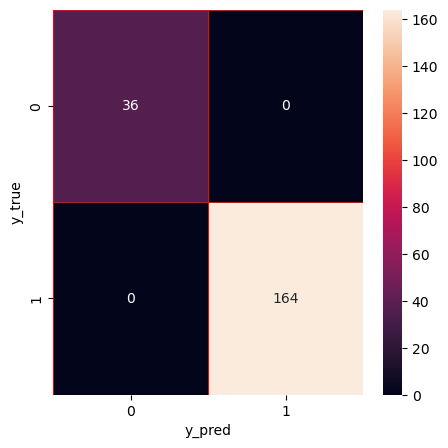

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [29]:
import pickle

pickle.dump(rfc,open('faiz.pkl','wb'))
model = pickle.load(open('faiz.pkl','rb'))